In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [15]:
# ========================================
# STEP 1: LOAD THE DATA
# ========================================

# Load training data
# Each row: 187 ECG signal values + 1 label (column 187)
train_df = pd.read_csv('data/mitbih_train.csv', header=None)
test_df = pd.read_csv('data/mitbih_test.csv', header=None)

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (87554, 188)
Test set shape: (21892, 188)


In [16]:
# ========================================
# STEP 2: UNDERSTAND THE DATA STRUCTURE
# ========================================

# Last column (187) is the label, first 187 columns are signal values
X_train = train_df.iloc[:, :-1].values  # Shape: (num_samples, 187)
y_train = train_df.iloc[:, -1].values   # Shape: (num_samples,)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (87554, 187)
y_train shape: (87554,)



=== CLASS DISTRIBUTION (Training Set) ===
Class 0 (Normal (N)): 72,471 samples (82.77%)
Class 1 (Supraventricular (S)): 2,223 samples (2.54%)
Class 2 (Ventricular (V)): 5,788 samples (6.61%)
Class 3 (Fusion (F)): 641 samples (0.73%)
Class 4 (Unknown (Q)): 6,431 samples (7.35%)


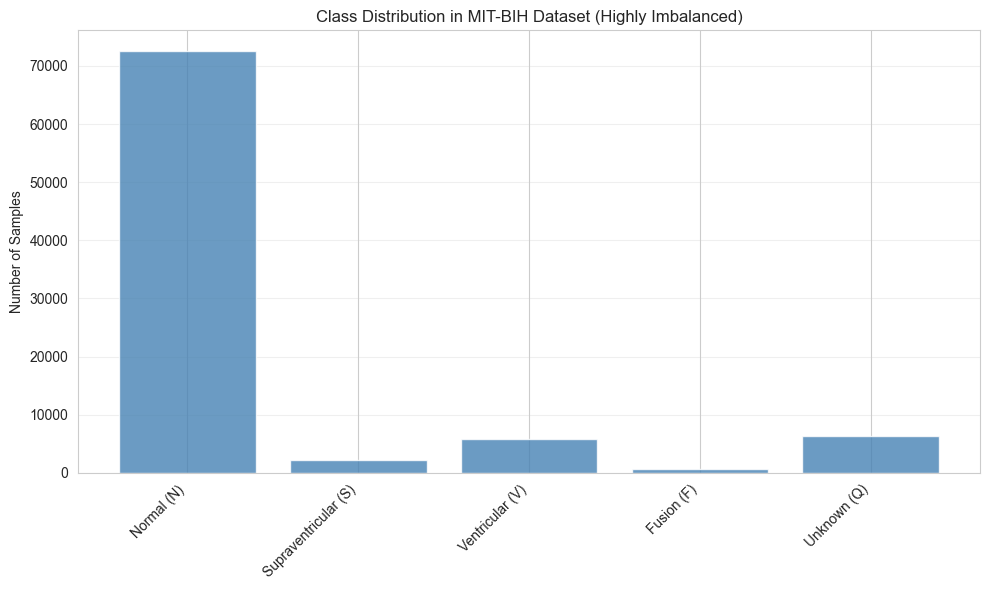

In [17]:
# ========================================
# STEP 3: ANALYZE CLASS DISTRIBUTION
# ========================================

# AAMI Classes:
# 0: Normal (N) - Normal beats, bundle branch blocks
# 1: Supraventricular (S) - Atrial premature beats
# 2: Ventricular (V) - Ventricular ectopic beats (PVCs)
# 3: Fusion (F) - Fusion of normal and ventricular
# 4: Unknown (Q) - Paced beats, unclassifiable

class_names = ['Normal (N)', 'Supraventricular (S)', 
               'Ventricular (V)', 'Fusion (F)', 'Unknown (Q)']

# Count samples per class
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("\n=== CLASS DISTRIBUTION (Training Set) ===")
for class_id, count in class_distribution.items():
    percentage = (count / len(y_train)) * 100
    print(f"Class {int(class_id)} ({class_names[int(class_id)]}): "
          f"{count:,} samples ({percentage:.2f}%)")

# Visualize class imbalance
plt.figure(figsize=(10, 6))
plt.bar(range(len(counts)), counts, color='steelblue', alpha=0.8)
plt.xticks(range(len(counts)), class_names, rotation=45, ha='right')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MIT-BIH Dataset (Highly Imbalanced)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

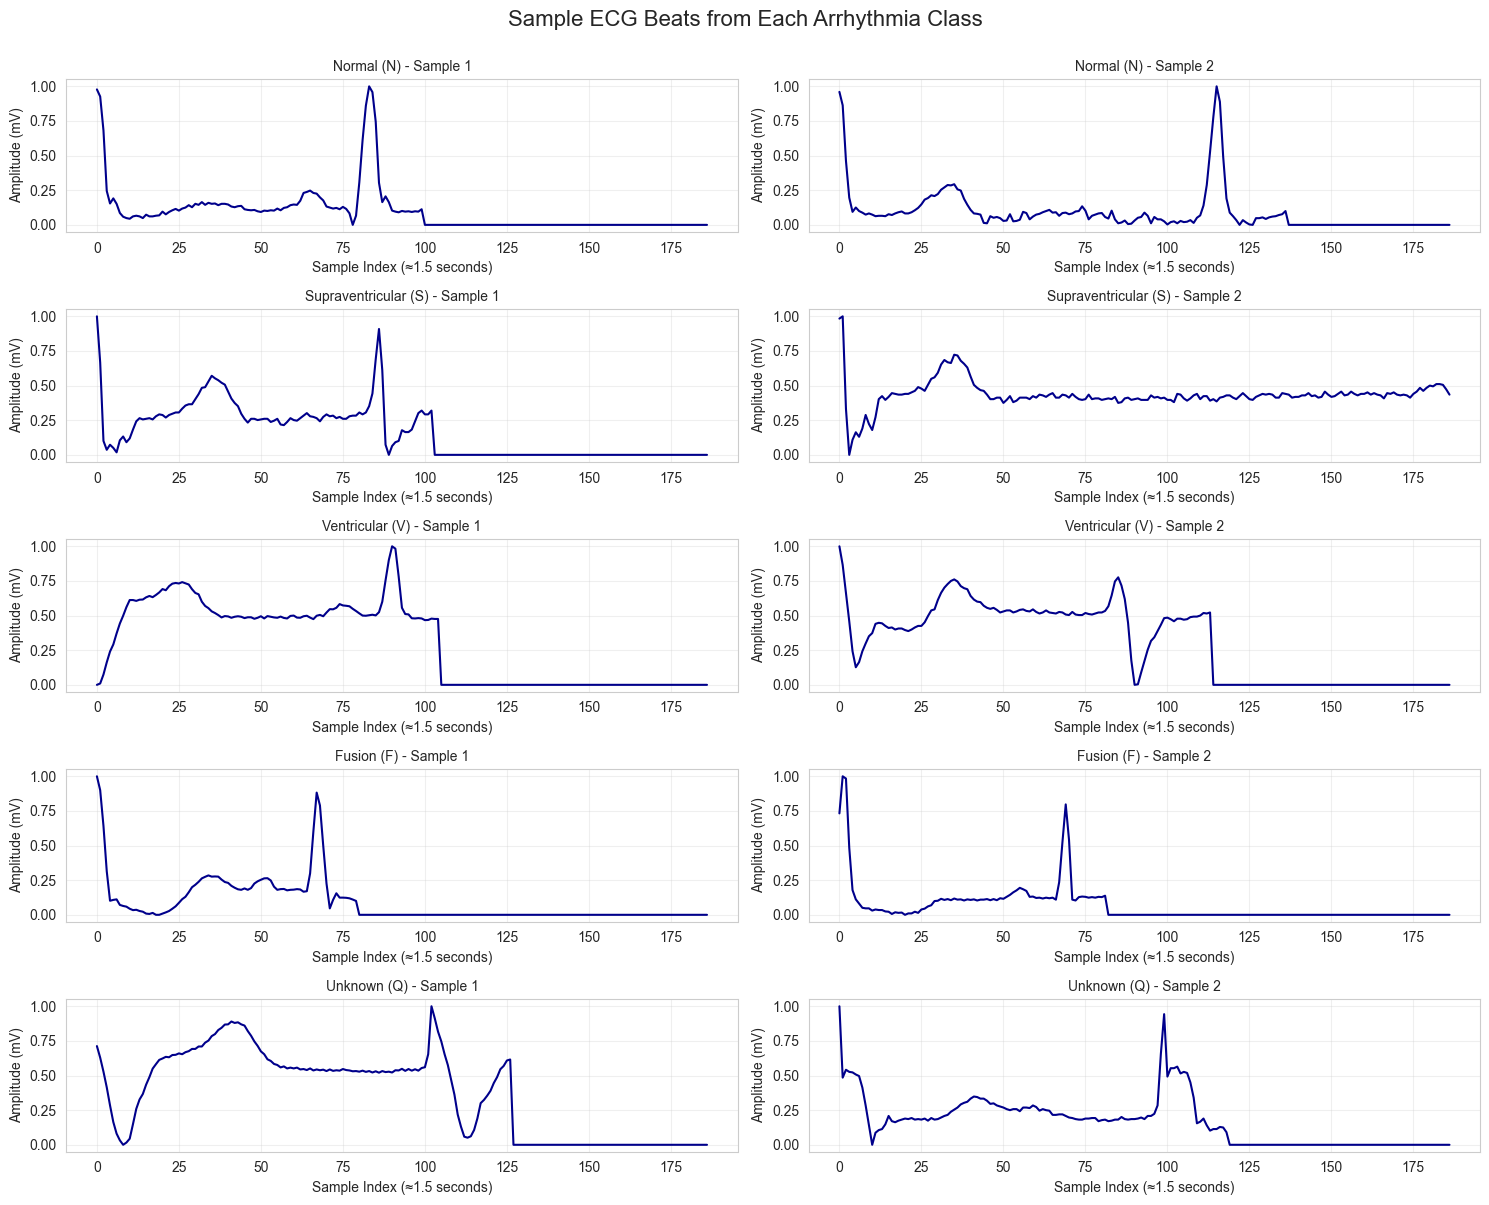

In [18]:
# ========================================
# STEP 4: VISUALIZE ECG SIGNALS
# ========================================

# Plot sample ECG beats from each class
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
fig.suptitle('Sample ECG Beats from Each Arrhythmia Class', fontsize=16, y=1.00)

for class_id in range(5):
    # Get indices of samples belonging to this class
    class_indices = np.where(y_train == class_id)[0]
    
    # Plot 2 examples per class
    for i in range(2):
        sample_idx = class_indices[i]
        signal = X_train[sample_idx]
        
        ax = axes[class_id, i]
        ax.plot(signal, linewidth=1.5, color='darkblue')
        ax.set_title(f"{class_names[class_id]} - Sample {i+1}", fontsize=10)
        ax.set_xlabel('Sample Index (≈1.5 seconds)')
        ax.set_ylabel('Amplitude (mV)')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# ========================================
# STEP 5: SIGNAL STATISTICS
# ========================================

print("\n=== SIGNAL STATISTICS ===")
print(f"Signal length per beat: {X_train.shape[1]} samples")
print(f"Mean signal value: {X_train.mean():.4f}")
print(f"Std signal value: {X_train.std():.4f}")
print(f"Min signal value: {X_train.min():.4f}")
print(f"Max signal value: {X_train.max():.4f}")


=== SIGNAL STATISTICS ===
Signal length per beat: 187 samples
Mean signal value: 0.1743
Std signal value: 0.2263
Min signal value: 0.0000
Max signal value: 1.0000


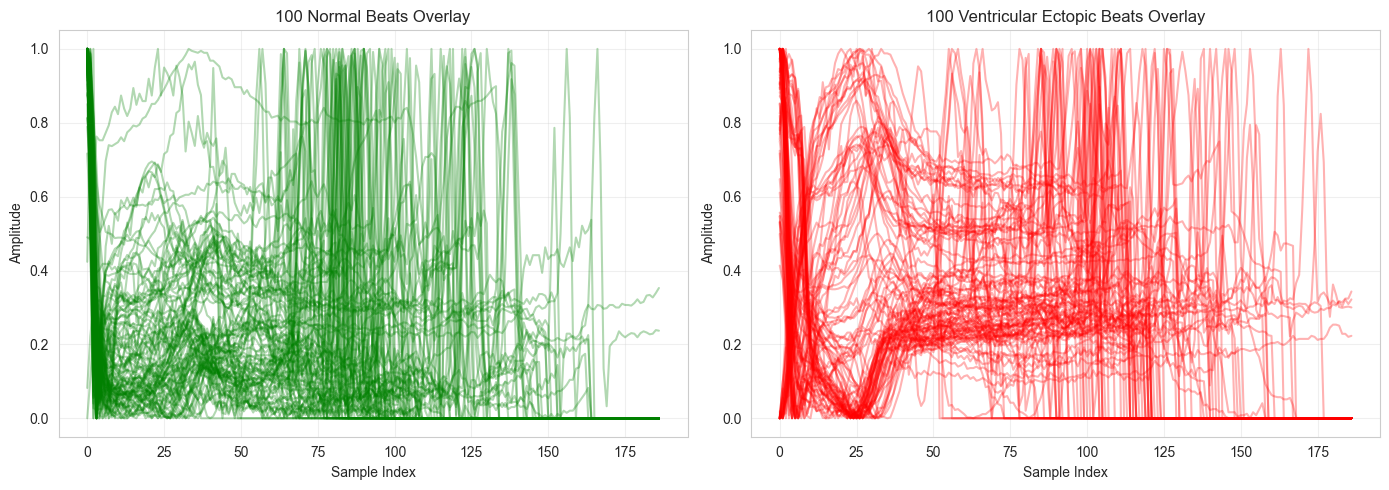


✓ Data exploration complete!


In [20]:
# ========================================
# STEP 6: ANALYZE SIGNAL VARIABILITY
# ========================================

# Compare normal vs abnormal beat variability
normal_signals = X_train[y_train == 0]
ventricular_signals = X_train[y_train == 2]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(normal_signals[:100].T, alpha=0.3, color='green')
plt.title('100 Normal Beats Overlay')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(ventricular_signals[:100].T, alpha=0.3, color='red')
plt.title('100 Ventricular Ectopic Beats Overlay')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Data exploration complete!")